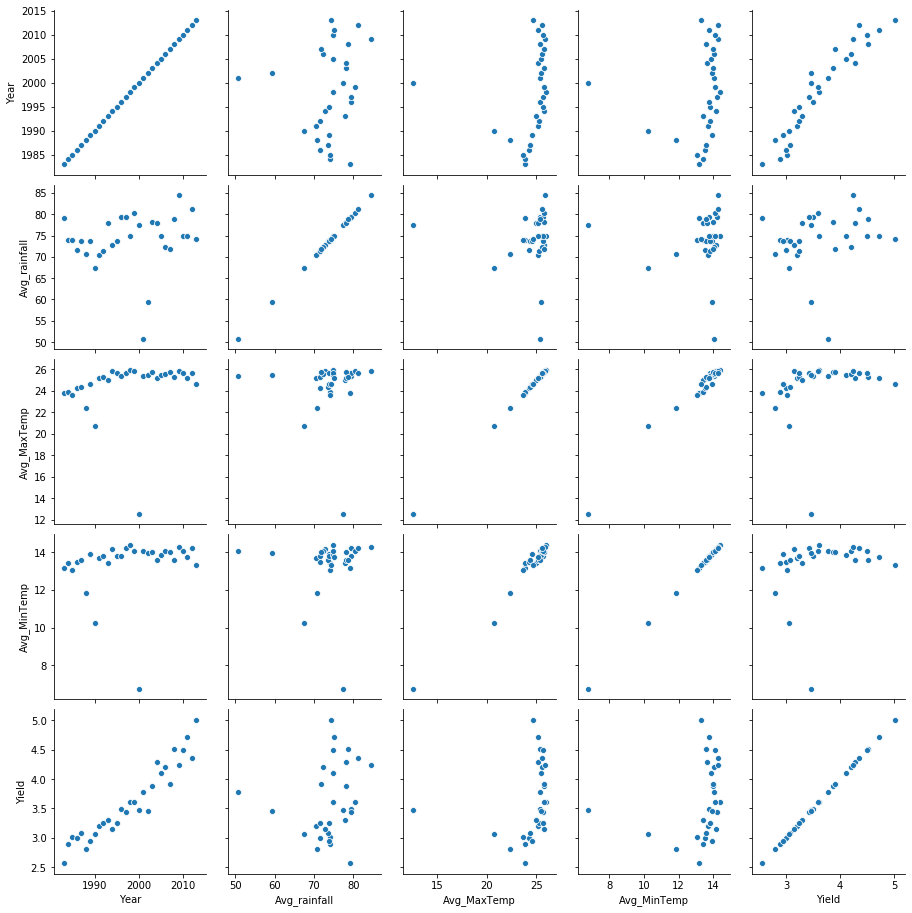

In [3]:
import pandas as pd
import os
import seaborn as sns
os.getcwd()
Data=pd.read_csv("maize_major_yield.csv")
ol_year=Data['year'].unique()
grp_yr=Data.groupby('year')

annual_rainfall=[]
avg_parameters=pd.DataFrame(grp_yr.mean())

##calculating current_list_rain for the values 
##only for rainfall for each year and first 12 elements belongs to
##1983 and so on.
current_list_rain=[]
for j in range(len(ol_year)):
    for k in range(0,37,3):
        current_list_rain.append(avg_parameters.iloc[j][k])
x=0
avg_rain={}
for year in ol_year:
    avg_rain[year]=[current_list_rain[i] for i in range(x,x+12)]
    x+=12
##calculating current_list_mean_min_temperature
##for the values only for rainfall for each year and first first 12 elements belongs to
##1983 and so on.        
current_list_mean_min_temp=[]
for j in range(len(ol_year)):
    for k in range(1,37,3):
        current_list_mean_min_temp.append(avg_parameters.iloc[j][k])
y=0
avg_mean_mintemp={}
for year in ol_year:
    avg_mean_mintemp[year]=[current_list_mean_min_temp[i] for i in range(y,y+12)]
    y+=12 
##calculating current_list_mean_max_temperature
##for the values only for rainfall for each year and first first 12 elements belongs to
##1983 and so on.
current_list_mean_max_temp=[]
for j in range(len(ol_year)):
    for k in range(2,37,3):
        current_list_mean_max_temp.append(avg_parameters.iloc[j][k])
z=0
avg_mean_maxtemp={}
for year in ol_year:
    avg_mean_maxtemp[year]=[current_list_mean_max_temp[i] for i in range(z,z+12)]
    z+=12 

avg_annual_rainfall=pd.DataFrame(avg_rain)
avg_annual_MaxTemp=pd.DataFrame(avg_mean_maxtemp)
avg_annual_MinTemp=pd.DataFrame(avg_mean_mintemp)

avg_annual_rainfall_yearwise={}
avg_annual_MaxTemp_yearwise={}
avg_annual_MinTemp_yearwise={}
for year in ol_year:
    avg_annual_rainfall_yearwise[year]=avg_annual_rainfall[year].mean()
    avg_annual_MaxTemp_yearwise[year]=avg_annual_MaxTemp[year].mean()
    avg_annual_MinTemp_yearwise[year]=avg_annual_MinTemp[year].mean()
avg_annual_rainfall_yearwise=pd.DataFrame([avg_annual_rainfall_yearwise])
avg_annual_rainfall_yearwise = avg_annual_rainfall_yearwise.stack().reset_index().drop('level_0',1).rename(columns={'level_1':'Year',0:'Avg_rainfall'})
avg_annual_MaxTemp_yearwise=pd.DataFrame([avg_annual_MaxTemp_yearwise])
avg_annual_MaxTemp_yearwise = avg_annual_MaxTemp_yearwise.stack().reset_index().drop('level_0',1).rename(columns={'level_1':'Year',0:'Avg_MaxTemp'})
avg_annual_MinTemp_yearwise=pd.DataFrame([avg_annual_MinTemp_yearwise])
avg_annual_MinTemp_yearwise = avg_annual_MinTemp_yearwise.stack().reset_index().drop('level_0',1).rename(columns={'level_1':'Year',0:'Avg_MinTemp'})
Yield_mod=pd.DataFrame([avg_parameters['yield']])
Yield_mod=Yield_mod.stack().reset_index().drop('level_0',1).rename(columns={'year':'Year',0:'Yield'})

MainData1=pd.concat([avg_annual_rainfall_yearwise['Year']])
MainData=pd.concat([avg_annual_rainfall_yearwise,avg_annual_MaxTemp_yearwise['Avg_MaxTemp'],avg_annual_MinTemp_yearwise['Avg_MinTemp'],Yield_mod['Yield']],axis=1)
#print(MainData)
g = sns.PairGrid(MainData)
g.map(sns.scatterplot) 



[[31.          4.43528987  6.65768529  5.8152847 ]
 [ 4.43528987 31.          0.18151554  0.60646823]
 [ 6.65768529  0.18151554 31.         30.4999248 ]
 [ 5.8152847   0.60646823 30.4999248  31.        ]]


C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


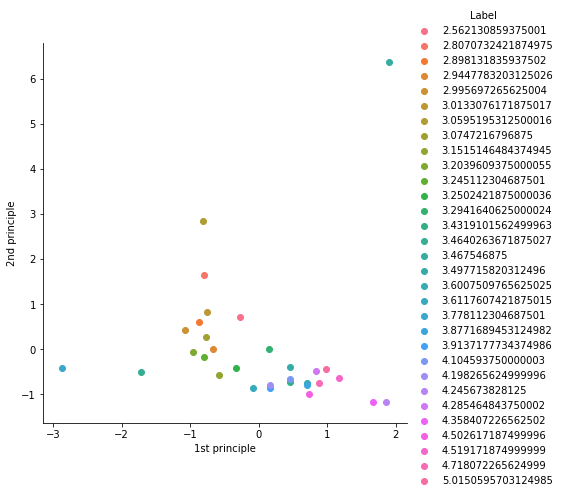

In [15]:
MainData2=pd.concat([avg_annual_rainfall_yearwise,avg_annual_MaxTemp_yearwise['Avg_MaxTemp'],avg_annual_MinTemp_yearwise['Avg_MinTemp']],axis=1)
%matplotlib inline
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
standardized_data=StandardScaler().fit_transform(MainData2)
sample_data=standardized_data
covar_matrix=np.matmul(sample_data.T,sample_data)
print(covar_matrix)
from scipy.linalg import eigh
Values,vectors=eigh(covar_matrix,eigvals=(2,3))
vectors=vectors.T
new_coordinates=np.matmul(vectors,sample_data.T)
new_coordinates=np.vstack((new_coordinates,Yield_mod['Yield'])).T
dataframe=pd.DataFrame(data=new_coordinates,columns=("1st principle","2nd principle","Label"))
import seaborn as sns
sns.FacetGrid(dataframe,hue="Label",size=6).map(plt.scatter,'1st principle','2nd principle').add_legend()
plt.show()